In this lab we are using Fisher's famous <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris data set</a>. The goal is to classify flowers from the Iris family into one of three species, that look as follows:

<table>
<tr>
<td> <img src="figures/iris_setosa.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_versicolor.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_virginica.jpg" width="200" style="height:150px"/> </td>
</tr>

<tr> 
<td>Iris Setosa</td>
<td>Iris Versicolor</td>
<td>Iris Virginica</td>
</tr>
</table>

Our data set contains 50 flowers from each class, thus 150 in total. There are four features, the length and width of the petal (dt. Kronblatt) and sepal (dt. Kelchblatt) in centimetres.

<img src="figures/petal_sepal.jpg" width="400" style="height:300px"/>

Your goal is to go through the notebook, understand premade code and text as well as filling blanks and exercises left for you. You may also edit the notebook as you wish. A good way to learn is to add comments (lines starting with #) or modifying the code and see what changes.

The data set is distributed with sci-kit learn.

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
import pandas as pd
import numpy as np

In [4]:
X = data.data
y = data.target 

print(type(X)) 
print(X.shape)

print('First three rows of data\n {0}'.format(X[:3]))
print('First three labels: {0}'.format(y[60:65]))

<class 'numpy.ndarray'>
(150, 4)
First three rows of data
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
First three labels: [1 1 1 1 1]


 Not only do we get the input matrix $X \in \mathbb{R}^{150 \times 4}$ and target $y \in \mathbb{R}^{150}$, but also meta information such as what the class labels $0, 1, 2$ stand for and what the features (i.e. columns of $X$) correspond to.

In [5]:
print(data.target_names)
print(data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<b>Exercise 1 </b>

Form the following DataFrames: 1) for data X with four atrributes (features); 2) for a target y (classification label).

In [6]:
# Exercise 1
a=pd.DataFrame(X,columns=data.feature_names)
print(a)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6     

In [7]:
#b=pd.DataFrame(y, column=data.target_names)
#print(b)

Below we focus our analysis on the first two variables, the sepal length and sepal width. Since we obtain a representation of the data in two dimensions, we are able to plot it. 

In [8]:
X_2 = X[:, :2]
y_2 = y

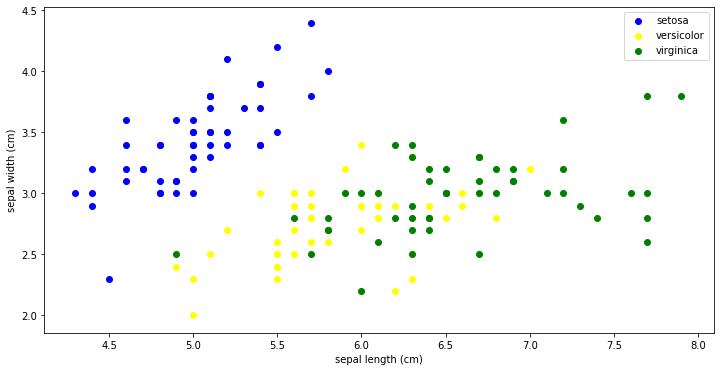

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 

def generate_scatter_plot(X, y,a1,b1):
    class_names = data.target_names
    class_colours = ['blue', 'yellow', 'green']

    fig = plt.figure(figsize = (12, 6)) 
    
    for i, class_colour in enumerate(class_colours):
        plt.scatter(X[y == i, a1], X[y == i, b1], c = class_colour, label = class_names[i])         

    plt.xlabel(data.feature_names[a1]) 
    plt.ylabel(data.feature_names[b1])
    plt.legend(loc = "best")

generate_scatter_plot(X_2, y,0,1)

We see that we could discriminate the iris setosa linearly from other two species. The linear function could even have a slope of about $1$. Let us substitute the first feature with the difference of the two features.

(150, 2)


Text(0.5, 0, 'sepal length - sepal width')

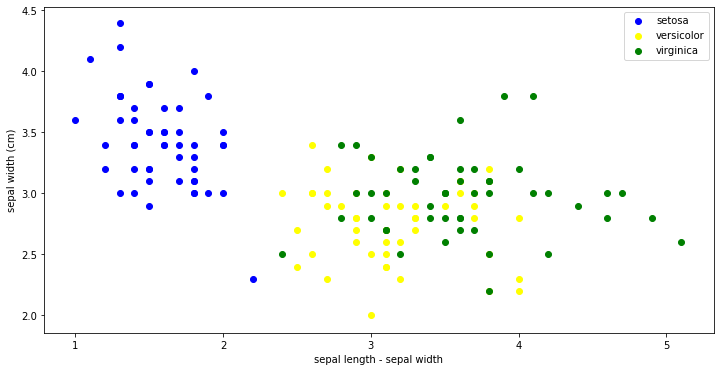

In [10]:
x_new = X[:, 0] - X[:, 1] 
X_new = np.column_stack((x_new, X[:, 1]))
#print(X_new)
print(X_new.shape)
generate_scatter_plot(X_new, y,0,1)
plt.xlabel("sepal length - sepal width")

Remember that our main goal is to find a model,

$$ y_\theta: X \rightarrow Y $$

such that $y_\theta(x)$ models the knowledge we got from our training data plus the inductive bias. The plot gives the decision rule (or part of): "If sepal length - sepal width <= 2.2 => Classify iris setosa".

<b>Exercise 2 </b>

Construct the plots using the other two features of the Iris data set, and try to linearly classify Iris Versicolor and Iris Virginica. After that determine the appropriate decision rules.

In [11]:
#Exercise 2
X_4 = X[:,:]

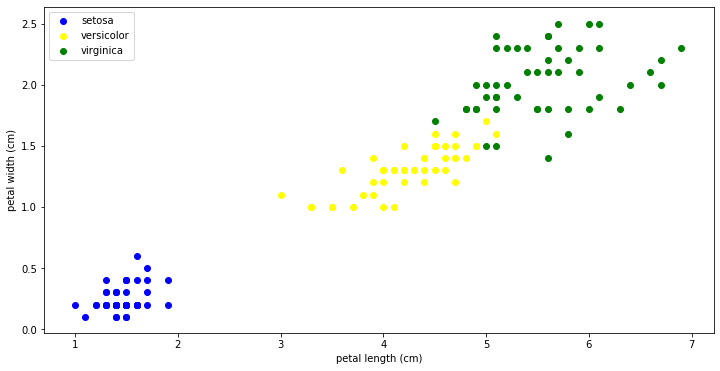

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt 
generate_scatter_plot(X_4, y,2,3)

(150, 4)


Text(0.5, 0, 'petal length - petal width')

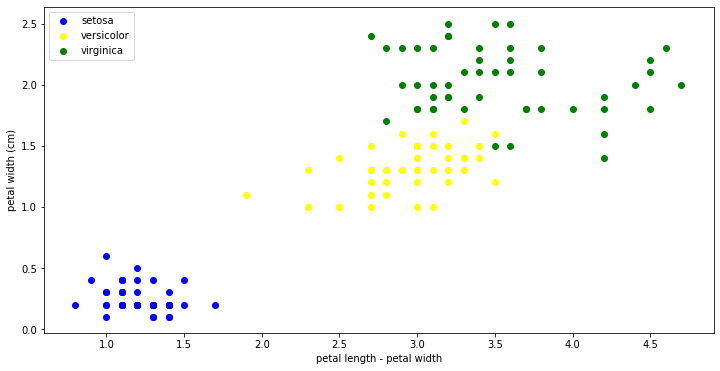

In [20]:
x_new = X[:,2] - X[:, 3] 
X_new = np.column_stack((x_new, X[:, 1:]))
print(X_new.shape)
generate_scatter_plot(X_new, y,0,3)
plt.ylabel(data.feature_names[3])
plt.xlabel("petal length - petal width")
#plt.xlim(3.4, 3.6)

<b>Exercise 3 </b>

Implement the naive decision rules found. If the conditions for Iris Setosa and Iris Versicolor are not fulfilled, classify the results as Iris Virginica.

<b>Note:</b> you just need to modify the function below.

In [18]:
 def naive_decision_rule(x):
    if (0<=x[2]-x[3]<=1.7) and (x[3]<=0.6):
        flower1 = "iris setosa"
        return flower1
    elif (1.8<=x[2]-x[3]<=3.5) and (0.7<=x[3]<=1.6):
        flower2 = "versicolor"
        return flower2
    else:
        flower3 = "virginica"
        return flower3


The following function takes a decision rule (or model) and a matrix of data points to generate the predictions for this matrix.

In [17]:
def predict(model, X):
    return np.apply_along_axis(model, axis=1, arr=X)

y_pred = predict(naive_decision_rule, X)
print(y_pred)

['iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 